In [14]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
trackPoints = pd.read_csv('./dataFolder/MV_m1_points.csv')
trackPoints.head()

,body_X,body_Y,nectary_X,nectary_Y,prob_base_X,prob_base_Y,prob_mid_X,prob_mid_Y,prob_1_X,prob_1_Y,prob_2_X,prob_2_Y,prob_3_X,prob_3_Y,prob_4_X,prob_4_Y,prob_5_X,prob_5_Y
0,388.078376,381.614068,372.227746,188.424715,381.619192,323.795071,380.238266,277.537139,381.059690,314.190856,381.198874,307.238159,381.084916,300.212757,380.799242,293.442655,380.405303,287.157793
1,386.810000,386.980000,372.970000,188.000000,381.348241,327.728714,379.416841,278.019424,380.405303,320.557345,380.743042,310.449771,380.743042,302.621466,380.306818,295.597465,380.208333,288.594333
2,383.100000,379.100000,373.950000,188.010000,378.548415,321.217857,379.950000,278.000000,378.337121,315.709023,378.463881,309.847593,378.691797,301.216386,379.125000,295.238330,379.223485,286.080388
3,379.238602,381.156274,374.930000,188.010000,377.155303,323.250858,376.815665,278.019424,377.226377,314.914284,378.008049,309.245416,377.096385,301.216386,377.253788,295.597465,376.859848,287.696495
4,378.700000,379.270000,374.940000,188.010000,376.495312,316.354012,377.010000,278.000000,377.363281,312.985141,376.640553,306.635981,376.754511,300.614209,376.465909,294.699627,376.958333,287.157793


In [3]:
# redorder the list of tracked points in proboscis 

def reorder_columns(string, df):
    list_of_coord = list([column for column in df.columns if string in column and 'prob' in column])
    myorder = [0, 2, 3, 4, 5, 6, 1]
    mylist = [list_of_coord[i] for i in myorder]
    return(mylist)

In [4]:
arr = []
for coord in ['_X', '_Y']:
    name = reorder_columns(coord, trackPoints)
    arr.append(name)
X_arr = trackPoints.loc[:, arr[0]]
Y_arr = trackPoints.loc[:, arr[1]]

In [16]:
X_arr.head()

,prob_base_X,prob_1_X,prob_2_X,prob_3_X,prob_4_X,prob_5_X,prob_mid_X
0,381.619192,381.059690,381.198874,381.084916,380.799242,380.405303,380.238266
1,381.348241,380.405303,380.743042,380.743042,380.306818,380.208333,379.416841
2,378.548415,378.337121,378.463881,378.691797,379.125000,379.223485,379.950000
3,377.155303,377.226377,378.008049,377.096385,377.253788,376.859848,376.815665
4,376.495312,377.363281,376.640553,376.754511,376.465909,376.958333,377.010000


In [6]:
X_arr.to_csv('./dataFolder/x_proboscis_ordered')
Y_arr.to_csv('./dataFolder/y_proboscis_ordered')

## fit a polyfit of whatever degree

In [7]:
def fitASecondDegCurve(xs, ys):
    p = np.poly1d(np.polyfit(ys, xs, deg = 3))
    return(p)

In [8]:
p_fit = []
for rr, x in X_arr.iterrows():
        y = Y_arr.loc[rr,:]
        p = fitASecondDegCurve(x.values, y.values)
        p_fit.append(p)

In [9]:
p_fit[40]

poly1d([-4.80372355e-05,  4.43871051e-02, -1.36050106e+01,  1.76024993e+03])

In [20]:
len(p_fit)

1000

In [10]:
np.save('./dataFolder/3DpolyfitVariables.npy', p_fit)

In [11]:
def MakeFigureForFit(x, y, p, ax):
    ax.plot(x, y, '.b', p(y),y,'-k')
    ax.set_xlim([x.min()-10,x.max() + 10])
    ax.set_ylim([y.min() -10, y.max() + 10])
    return()

In [12]:
folder = './dataFolder/computeInterpolation/Polyfit3/'

KeyboardInterrupt: 

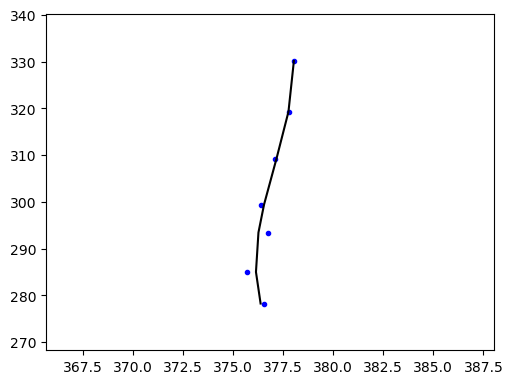

In [13]:
# make figures to access the interpolation

f = plt.figure()
ax = f.add_axes([0.3, 0.3, 0.7, 0.7])

for ii, p in enumerate(p_fit):
    x = X_arr.loc[ii,:].values
    y = Y_arr.loc[ii,:].values
    MakeFigureForFit(x,y,p,ax)
    figname = str(ii).zfill(4) + '.png'
    plt.savefig(folder + figname)

    plt.cla()

In [ ]:
# from scipy import interpolate
# 
# def interpol_points(x, y):
#     tck, u = interpolate.splprep([x, y], s=3)
#     new_points = interpolate.splev(u, tck, der=0)
#     return(new_points)

In [ ]:
# new_x = []
# new_y = []
# for r, data in X_arr.iterrows():
#     x = data.values
#     y = Y_arr.loc[r, :].values
#     pts__ = interpol_points(x, y)
#     x__ = pts__[0]
#     y__ = pts__[1]
#     new_x.append(x__)
#     new_y.append(y__)